Import Libraries

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

Import and assign dataset to variable

In [128]:
aapl = pd.read_csv('AAPL.csv',parse_dates=['Date'], index_col= ['Date'], dayfirst = True)
amzn = pd.read_csv('AMZN.csv',parse_dates=['Date'], index_col= ['Date'], dayfirst = True)

Preview data and info

In [129]:
aapl.head()

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.100039
1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094820
1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087861
1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.090035
1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092646


In [130]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10502 entries, 1980-12-12 to 2022-08-08
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Low             10502 non-null  float64
 1   Open            10502 non-null  float64
 2   Volume          10502 non-null  int64  
 3   High            10502 non-null  float64
 4   Close           10502 non-null  float64
 5   Adjusted Close  10502 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 574.3 KB


Remove column

In [131]:
aapl.loc[:, aapl.columns!='Volume']

,Low,Open,High,Close,Adjusted Close
Date,,,,,
1980-12-12,0.128348,0.128348,0.128906,0.128348,0.100039
1980-12-15,0.121652,0.122210,0.122210,0.121652,0.094820
1980-12-16,0.112723,0.113281,0.113281,0.112723,0.087861
1980-12-17,0.115513,0.115513,0.116071,0.115513,0.090035
1980-12-18,0.118862,0.118862,0.119420,0.118862,0.092646
...,...,...,...,...,...
2022-08-02,159.630005,160.100006,162.410004,160.009995,159.788040
2022-08-03,160.750000,160.839996,166.589996,166.130005,165.899567
2022-08-04,164.429993,166.009995,167.190002,165.809998,165.580002


Checking if data needs to be cleaned

In [132]:
aapl.isnull().any(axis = 1).sum() #No missing values

0

In [133]:
print(aapl.duplicated().sum) #No duplicate rows

<bound method Series.sum of Date
1980-12-12    False
1980-12-15    False
1980-12-16    False
1980-12-17    False
1980-12-18    False
              ...  
2022-08-02    False
2022-08-03    False
2022-08-04    False
2022-08-05    False
2022-08-08    False
Length: 10502, dtype: bool>


If the open price goes up, the High and Low price for the day will likely go up too. Volume has little impact or correlation on a large timeline

In [134]:
print(aapl.corr()) 
aaplCorr = aapl.corr()

                     Low      Open    Volume      High     Close  \
Low             1.000000  0.999926 -0.201644  0.999911  0.999929   
Open            0.999926  1.000000 -0.200733  0.999943  0.999850   
Volume         -0.201644 -0.200733  1.000000 -0.200172 -0.200922   
High            0.999911  0.999943 -0.200172  1.000000  0.999926   
Close           0.999929  0.999850 -0.200922  0.999926  1.000000   
Adjusted Close  0.999587  0.999525 -0.203676  0.999630  0.999684   

                Adjusted Close  
Low                   0.999587  
Open                  0.999525  
Volume               -0.203676  
High                  0.999630  
Close                 0.999684  
Adjusted Close        1.000000  


In [135]:
print(aapl[-365:-1].corr()) 

                     Low      Open    Volume      High     Close  \
Low             1.000000  0.995995 -0.021407  0.995718  0.995565   
Open            0.995995  1.000000  0.012600  0.996571  0.989771   
Volume         -0.021407  0.012600  1.000000  0.038257  0.006322   
High            0.995718  0.996571  0.038257  1.000000  0.995377   
Close           0.995565  0.989771  0.006322  0.995377  1.000000   
Adjusted Close  0.995193  0.989649  0.005714  0.995503  0.999865   

                Adjusted Close  
Low                   0.995193  
Open                  0.989649  
Volume                0.005714  
High                  0.995503  
Close                 0.999865  
Adjusted Close        1.000000  


In [136]:
print(aapl['Low'].rolling(30).corr(aapl['Volume']))

Date
1980-12-12         NaN
1980-12-15         NaN
1980-12-16         NaN
1980-12-17         NaN
1980-12-18         NaN
                ...   
2022-08-02   -0.161047
2022-08-03   -0.067115
2022-08-04   -0.167844
2022-08-05   -0.238672
2022-08-08   -0.246303
Length: 10502, dtype: float64


Plot date to daily high

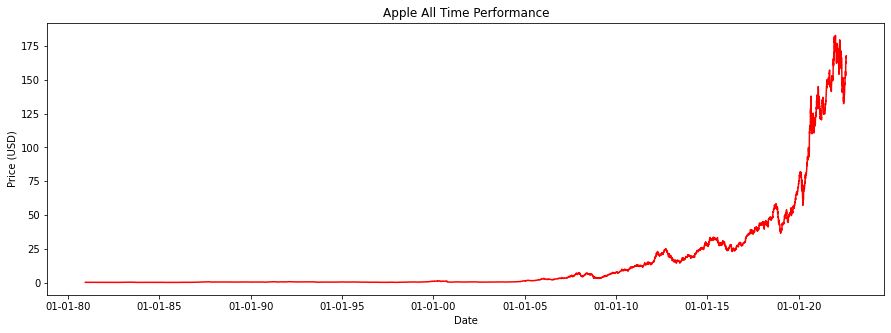

In [137]:
fig, ax = plt.subplots(figsize=(15, 5))

# Add x-axis and y-axis
ax.plot(aapl.index.values, aapl['High'], color = 'red')

# Set title and labels for axes
ax.set(xlabel="Date", ylabel="Price (USD)", title="Apple All Time Performance")

date_form = DateFormatter("%d-%m-%y")
ax.xaxis.set_major_formatter(date_form)

fig.savefig("aapl.png")
plt.show()

Assign a 1 year period to a new variables

In [138]:
aapl_new = aapl.iloc[-365:-1]
amzn_new = amzn.iloc[-365:-1]

Apple perfomance for 1 year

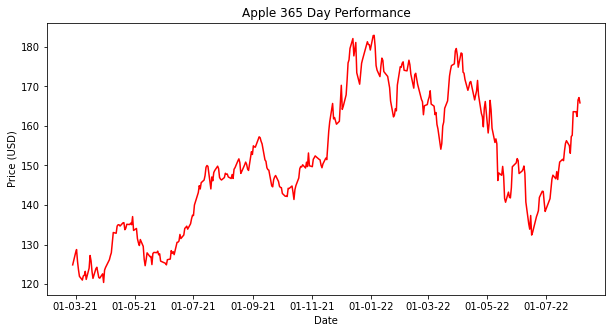

In [139]:
fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
ax.plot(aapl_new.index.values, aapl_new['High'], color = 'red')

# Set title and labels for axes
ax.set(xlabel="Date", ylabel="Price (USD)", title="Apple 365 Day Performance")

date_form = DateFormatter("%d-%m-%y")
ax.xaxis.set_major_formatter(date_form)

fig.savefig("aapl1year.png")
plt.show()

Plot the 2 variables against each other on a line graph

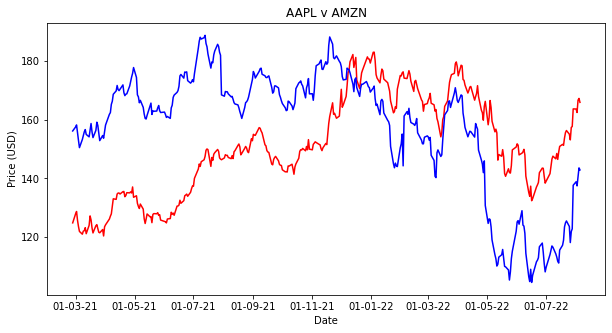

In [140]:
fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
ax.plot(aapl_new.index.values, aapl_new['High'], color = 'red')

ax.plot(amzn_new.index.values, amzn_new['High'], color = 'blue')

# Set title and labels for axes
ax.set(xlabel="Date", ylabel="Price (USD)", title="AAPL v AMZN")

date_form = DateFormatter("%d-%m-%y")
ax.xaxis.set_major_formatter(date_form)

fig.savefig("aaplamzn1.png")
plt.show()

Change date range

In [141]:
aapl_new = aapl.iloc[-730:-365]
amzn_new = amzn.iloc[-730:-365]

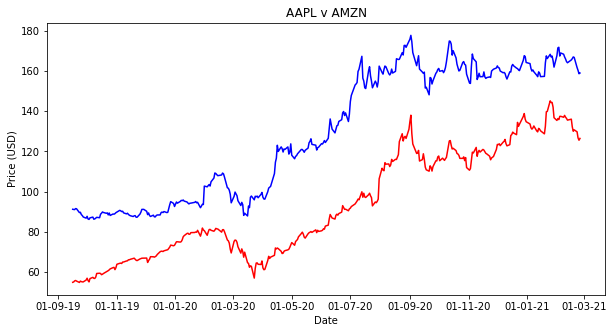

In [142]:
fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
ax.plot(aapl_new.index.values, aapl_new['High'], color = 'red')

ax.plot(amzn_new.index.values, amzn_new['High'], color = 'blue')

# Set title and labels for axes
ax.set(xlabel="Date", ylabel="Price (USD)", title="AAPL v AMZN")

date_form = DateFormatter("%d-%m-%y")
ax.xaxis.set_major_formatter(date_form)

fig.savefig("aaplamzn2.png")           
plt.show()

In [183]:
val1 = 0
val2 = 0
totalAverage = 0
for i in range(364):
    val1 = aapl_new.iloc[i,3]
    val2 = aapl_new.iloc[i+1,3]
    valAverage = val2 / val1
    totalAverage = totalAverage + valAverage
    
totalAverage = totalAverage/365
print(totalAverage,("% Average Daily Increase"))

0.9997576449171724 % Average Daily Increase
